In [ ]:
!pip install pandas numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("/content/student_data.csv")
print("Dataset Loaded Successfully!\n")
print(data.head())

Dataset Loaded Successfully!

   StudyHours  Attendance  PreviousScore  AssignmentMarks Results
0           5          85             70               75    Pass
1           2          60             40               45    Fail
2           6          90             80               85    Pass
3           4          75             60               65    Pass
4           1          50             35               30    Fail


In [ ]:
print("Columns in Dataset:")
print(data.columns)

Columns in Dataset:
Index(['StudyHours', 'Attendance', 'PreviousScore', 'AssignmentMarks',
       'Results'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()

print("Cleaned Columns:")
print(data.columns)

Cleaned Columns:
Index(['StudyHours', 'Attendance', 'PreviousScore', 'AssignmentMarks',
       'Results'],
      dtype='object')


In [ ]:
print("Unique values in Result column:")
print(data["Results"].unique())

Unique values in Result column:
['Pass' 'Fail']


In [ ]:
data["Results"] = data["Results"].astype(str)
data["Result"] = data["Results"].str.strip()
data["Results"] = data["Results"].str.capitalize()

print("Cleaned Result Values:")
print(data["Results"].unique())

Cleaned Result Values:
['Pass' 'Fail']


In [ ]:
data["Results"] = data["Results"].map({"Pass": 1, "Fail": 0})

print("After Mapping:")
print(data["Results"].unique())

After Mapping:
[1 0]


In [ ]:
data = data.dropna()

print("Dataset after removing NaN:")
print(data.head())

Dataset after removing NaN:
   StudyHours  Attendance  PreviousScore  AssignmentMarks  Results Result
0           5          85             70               75        1   Pass
1           2          60             40               45        0   Fail
2           6          90             80               85        1   Pass
3           4          75             60               65        1   Pass
4           1          50             35               30        0   Fail


In [ ]:
X = data[["StudyHours", "Attendance", "PreviousScore", "AssignmentMarks"]]
y = data["Results"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9, 4)
y shape: (9,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)

Training Data Size: (7, 4)
Testing Data Size: (2, 4)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model Training Completed Successfully")

Model Training Completed Successfully


In [ ]:
y_pred = model.predict(X_test)

print("Predictions:", y_pred)

Predictions: [0 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy * 100, "%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 100.0 %

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



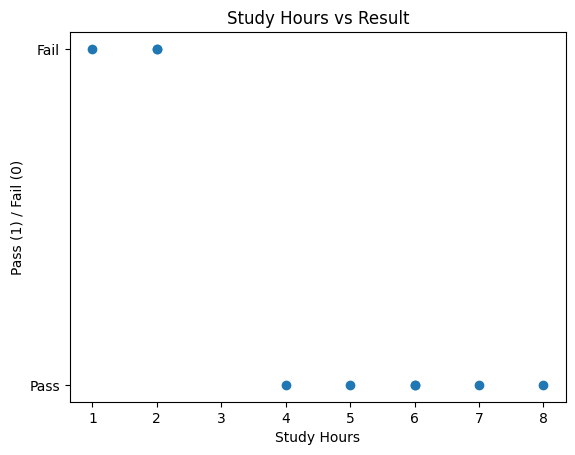

In [ ]:
plt.figure()
plt.scatter(data["StudyHours"], data["Result"])
plt.title("Study Hours vs Result")
plt.xlabel("Study Hours")
plt.ylabel("Pass (1) / Fail (0)")
plt.show()

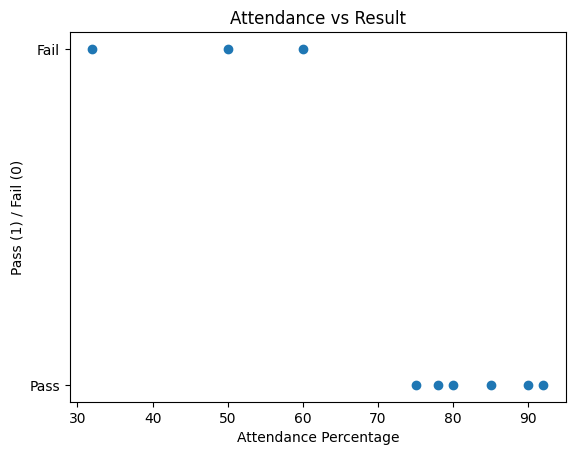

In [ ]:
plt.figure()
plt.scatter(data["Attendance"], data["Result"])
plt.title("Attendance vs Result")
plt.xlabel("Attendance Percentage")
plt.ylabel("Pass (1) / Fail (0)")
plt.show()

In [ ]:
new_student = np.array([[4, 78, 65, 70]])

prediction = model.predict(new_student)

if prediction[0] == 1:
    print("Prediction: Student will PASS")
else:
    print("Prediction: Student will FAIL")

Prediction: Student will PASS


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
